# pySAM run 

In [1]:
import PySAM
import PySAM.Pvsamv1 as PV
import PySAM.Grid as Grid
import PySAM.Utilityrate5 as UtilityRate
import PySAM.Cashloan as Cashloan
import pathlib, os
import json
import pvlib
import pandas as pd
import numpy as np


In [2]:
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("Numpy version ", np.__version__)
print("Pvlib version: ", pvlib.__version__)
print("PySAM version: ", PySAM.__version__)

Working on a  Windows 10
Python version  3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
Pandas version  2.2.2
Pvlib version:  0.11.0
PySAM version:  5.1.0


In [3]:
# Loading dat for a Single Owner
jsonfolder = '01'
jsonnames = '01'
file_names = ["pvsamv1", "grid", "utilityrate5", "cashloan"]

pv4 = PV.new()
grid4 = Grid.from_existing(pv4)
ur4 = UtilityRate.from_existing(pv4)
so4 = Cashloan.from_existing(grid4, 'FlatPlatePVCommercial')

for count, module in enumerate([pv4, grid4, ur4, so4]):
    filetitle= jsonnames + '_' + file_names[count] + ".json"
    with open(os.path.join(jsonfolder,filetitle), 'r') as file:
        data = json.load(file)
        for k, v in data.items():
            if k == 'number_inputs':
                continue
            try:
                if sys.version.split(' ')[0] == '3.11.7': 
                    # Check needed for python 3.10.7 and perhaps other releases above 3.10.4.
                    # This prevents the failure "UnicodeDecodeError: 'utf-8' codec can't decode byte... 
                    # This bug will be fixed on a newer version of pysam (currently not working on 5.1.0)
                    if 'adjust_' in k:  # This check is needed for Python 3.10.7 and some others. Not needed for 3.7.4
                        print(k)
                        k = k.split('adjust_')[1]
                module.value(k, v)
            except AttributeError:
                # there is an error is setting the value for ppa_escalation
                print(module, k, v)

<Pvsamv1 object at 0x000001D04C7CCCC0> adjust_constant 0
<Pvsamv1 object at 0x000001D04C7CCCC0> adjust_en_timeindex 0
<Pvsamv1 object at 0x000001D04C7CCCC0> adjust_en_periods 0
<Pvsamv1 object at 0x000001D04C7CCCC0> adjust_timeindex [0]
<Pvsamv1 object at 0x000001D04C7CCCC0> adjust_periods [[0, 0, 0]]
<Pvsamv1 object at 0x000001D04C7CCCC0> dc_adjust_constant 0
<Pvsamv1 object at 0x000001D04C7CCCC0> dc_adjust_en_timeindex 0
<Pvsamv1 object at 0x000001D04C7CCCC0> dc_adjust_en_periods 0
<Pvsamv1 object at 0x000001D04C7CCCC0> dc_adjust_timeindex [0]
<Pvsamv1 object at 0x000001D04C7CCCC0> dc_adjust_periods [[0, 0, 0]]


In [4]:
# Sanity Check
pv4.SolarResource.solar_resource_file

#Example of changing resource files
#pv4.unassign('solar_resource_file')

'C:/SAM/2023.12.17/solar_resource/phoenix_az_33.450495_-111.983688_psmv3_60_tmy.csv'

In [5]:
#Execute
pv4.execute()
grid4.execute()
ur4.execute()
so4.execute()

# SAVE RESULTS|
results = pv4.Outputs.export()
economicresults = so4.Outputs.export()

In [10]:
# Example of accessing outputs
results['annual_energy']

160082.85107117283

Deradation ones

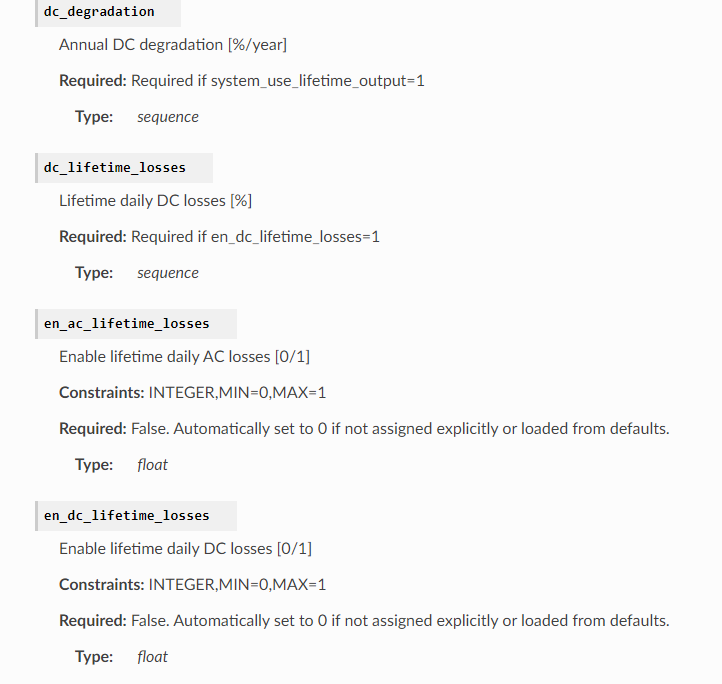

In [ ]:
pv4.Lifetime.dc_degradation

In [ ]:
len(pv4.Lifetime.dc_lifetime_losses)  # daily losses -- so 365 * 25 years = 9125
# Why is this 9125 ? 

In [ ]:
pv4.Lifetime.en_dc_lifetime_losses = 1

In [ ]:
pv4.Lifetime.assign('dc_lifetime_losses', ['BLABLBALBA'])

Cuistom period will repeat the lossess each year. Timeseires better option to modify hourly for each year (8760*25 lifetime ish)
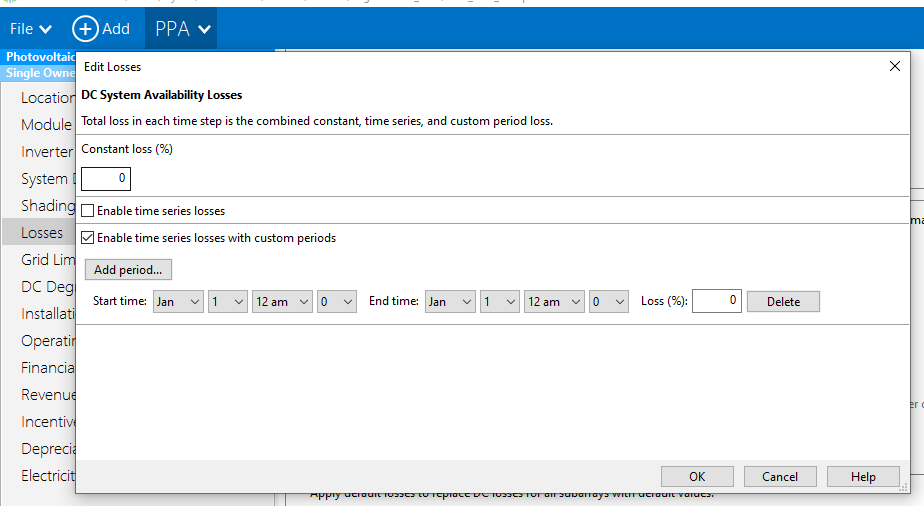

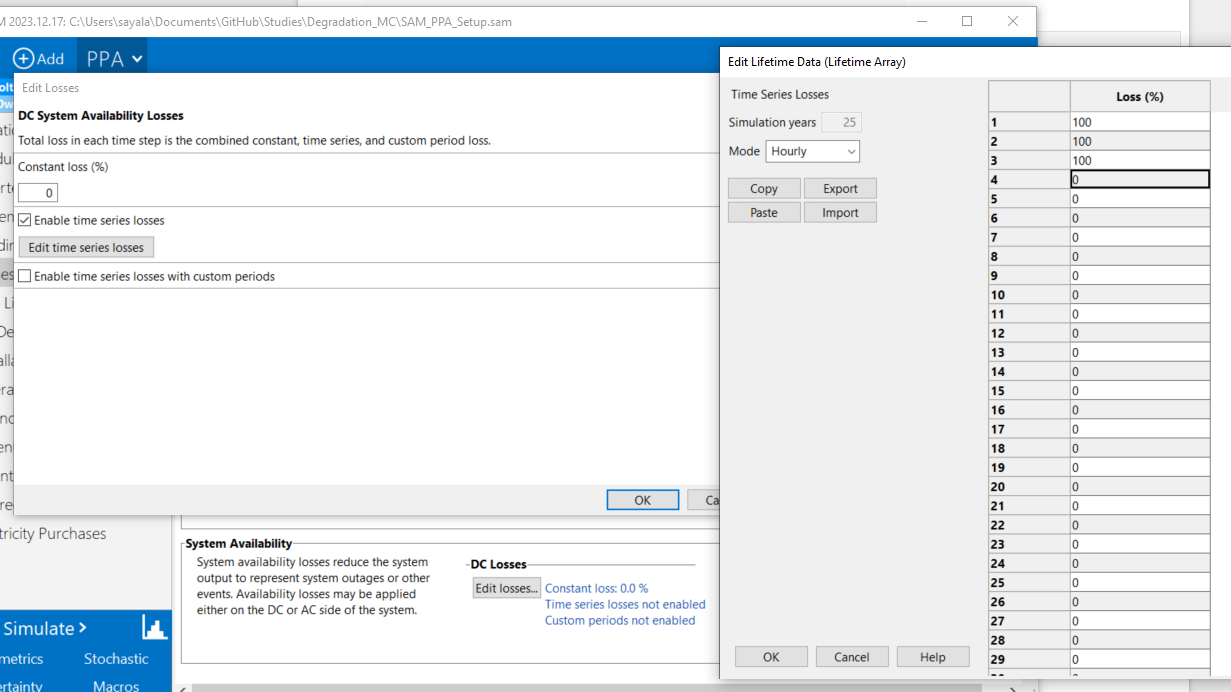

In [ ]:
ur4.system_availability  # I think this is specifi for utility rate systems (PPA); exmaple of load below.

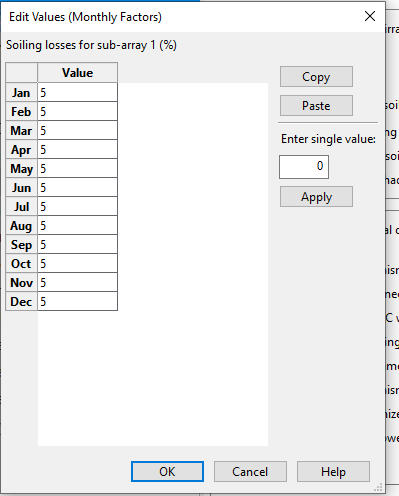

In [ ]:
### 
AC Side: constants, hourly, periods, _DC
https://nrel-pysam.readthedocs.io/en/main/modules/Pvsamv1.html#adjustmentfactors-group

In [8]:
results # Find here which is the variable fro ground diffuse. 

AttributeError: 'dict' object has no attribute '__dict__'

Check Solar_resource_data to see if we can pass 25*8760 input data hourly.

In [ ]:
pv1.Load.grid_outage
ur1.system_availability

In [ ]:
ur4.system_availability  # I think this is specifi for utility rate systems (PPA); exmaple of load below.